In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
sys.path.insert(0,'..')
from dataloader import DataLoaderDALES, DataLoaderMicroHH

In [2]:
def mav(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# Plot vertical profiles at a single time
def plot_1d(var, xlab, tplt, tav, zmin, zmax):
    fig=plt.figure(); ax=plt.gca()
    for i in range(len(lps)):
        lp = lps[i]

        if mods[i] == 'dales':
            dl = DataLoaderDALES(lp)
            col =  plt.cm.RdYlBu(0.99)
        elif mods[i] == 'microhh':
            dl = DataLoaderMicroHH(lp)
            col  =  plt.cm.RdYlBu(0.7)

        time = dl.time1d/3600
        zt   = dl.zf

        itmin  = np.argmin(abs(tplt-time))
        itmax =  np.argmin(abs(tplt+tav-time))

        izs = np.argmin(abs(zmin-zt))
        ize = np.argmin(abs(zmax-zt))

        load_func = getattr(dl, 'load_'+var+'av')
        pltvar = np.mean(load_func(izs,ize)[itmin:itmax,:],axis=0)

        ax.plot(pltvar,zt[izs:ize],label=labs[i],color=col,linestyle=ls[i])

    ax.set_ylabel('z [m]')
    ax.set_xlabel(xlab if len(xlab)>0 else var.split('/')[-1])
    # ax.set_title('t = %.2f'%(tplt) +' hr')
    ax.legend(loc='best',bbox_to_anchor=(1,1))
    ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
    plt.savefig(sp+'/prof_'+var+'_t'+str(tplt)+'.pdf',bbox_inches='tight')
    plt.show()

Initialising dataloader...
Set paths to all datasets and extracted dimensions
Initialising dataloader...
Set paths to all datasets and extracted dimensions
Initialising dataloader...
Set paths to all datasets and extracted dimensions
Initialising dataloader...
Set paths to all datasets and extracted dimensions
Initialising dataloader...
Set paths to all datasets and extracted dimensions


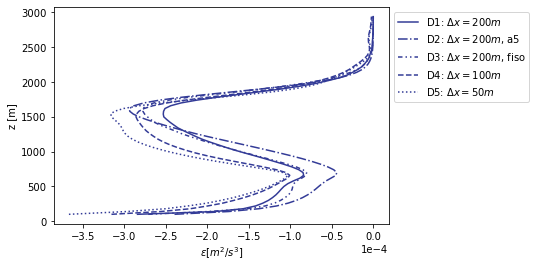

In [3]:
# RUN SETTINGS
rp = '/scratch-shared/janssens'

lps = [rp+'/bomex200_from100_12hr',
      rp+'/bomex100a5_from100_12hr',
      rp+'/bomex200_fiso_from100_12hr',
      rp+'/bomex100_e12',
      rp+'/bomex50',
      ]
sp = '/scratch-shared/janssens/bomex_comparisons'

labs = [
       r'D1: $\Delta x = 200m$',
       r'D2: $\Delta x = 200m$, a5',
       r'D3: $\Delta x = 200m$, fiso',
       r'D4: $\Delta x = 100m$',
       r'D5: $\Delta x = 50m$',
       ]
mods = [
       'dales',
       'dales',
       'dales',
       'dales',
       'dales',
       ]

ls = ['-',
      '-.',
      (0, (3, 2, 1, 2, 1, 2)),
      '--',
      ':',
      ]

# PLOT SETTINGS
var  = 'diss'
xlab = r'$\varepsilon [m^2/s^3]$'
tplt = 12
tav = 2
zmin = 100
zmax = 3000
plot_1d(var, xlab, tplt, tav, zmin, zmax)

Initialising dataloader...
Set paths to all datasets and extracted dimensions
Initialising dataloader...
Set paths to all datasets and extracted dimensions
Initialising dataloader...
Set paths to all datasets and extracted dimensions


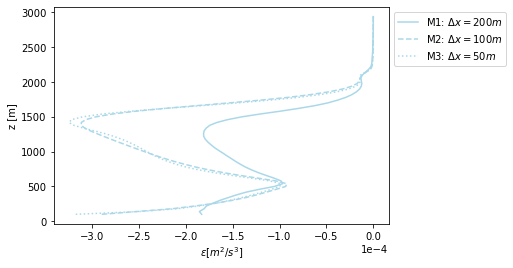

In [4]:
# MicroHH (not restarted so cannot compare to DALES simulations at 12-14 hrs)

# RUN SETTINGS
rp = '/scratch-shared/janssens'

lps = [
      rp+'/tmp.bomex/bomex_200m',
      rp+'/tmp.bomex/bomex_100m',
      rp+'/tmp.bomex/bomex_50m',
      ]
sp = '/scratch-shared/janssens/bomex_comparisons'

labs = [
       r'M1: $\Delta x = 200m$',
       r'M2: $\Delta x = 100m$',
       r'M3: $\Delta x = 50m$',
       ]
mods = [
       'microhh',
       'microhh',
       'microhh',
       ]

ls = [
      '-',
      '--',
      ':'
      ]

# PLOT SETTINGS
var  = 'diss'
xlab = r'$\varepsilon [m^2/s^3]$'
tplt = 3
tav = 2
zmin = 100
zmax = 3000
plot_1d(var, xlab, tplt, tav, zmin, zmax)